In [ ]:
#Goal: preprocess the raw datasets from Quotient and demographics from in-house data to one clean dataset ready for modeling

#steps:
#1. merge Quotient dataset of 3 segments (flavorfirst, sweettreat, modernhealth) and the total spending into one. 
#2. merge the segment dataset (response) with in-house data demographic features (predictors):
#      a.aggregate to yearly level
#      b.leave at monthly level
#3. clean the datasets

# data input:
# Quotient total spending info with common household ID in NPM:
#     data_2020-06-09/npm_handshakes_month.csv.gz
# Quotient segments spend info with common household ID in NPM:
#     data_2020-06-09/sweettreats_month.csv.gz
#     data_2020-06-09/flavorfirst_month.csv.gz
#     data_2020-06-09/modernhealth_month.csv.gz
#in-house data household demo

#data ouput:
# segments spending info with household demographic attached aggregated at year level:
#     df_common_hh_agg_complete_clean.csv
# segments spending info with household demographic attached at monthly level:
#     df_common_hh_monthly_complete_clean.csv

In [1]:
import sys
# import boto3
print(sys.prefix)

/home/helu8001/miniconda3/envs/sklearn-dev


In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import pandas as pd
import os

In [3]:
import sklearn
print(sklearn.__version__)

0.23.1


In [4]:
os.listdir() 

['.ipynb_checkpoints',
 'data_2020-05-27',
 'data_2020-06-09',
 'df_common_hh_agg_complete.csv',
 'df_common_hh_agg_complete_clean.csv',
 'df_common_hh_monthly.csv',
 'df_common_hh_monthly_clean.csv',
 'df_common_hh_monthly_complete.csv',
 'df_common_hh_monthly_complete_clean.csv',
 'df_flavorfirst_hh.csv',
 'df_modernhealth_hh.csv',
 'df_sweettreats_hh.csv',
 'handshakes_wspend.csv',
 'hh_demo',
 'plot_cv_diabetes.ipynb',
 'plot_linear_model_coefficient_interpretation.ipynb',
 'Quotient_preprocessing-Quotient-all.ipynb',
 'Quotient_preprocessing_all_monthly.ipynb',
 'Quotient_preprocessing_monthly_quotient>0.ipynb',
 'Quotient_preprocessing_quotient=1_inner-join.ipynb',
 'Quotient_preprocessing_segment-spend>0.ipynb',
 'Quotient_preprocessing_year_quotient>0.ipynb',
 'sklearn_all-targets_over_total-count_Tweedie_monthly-agg-quotient>=0.ipynb',
 'sklearn_all-targets_over_total-spend_Tweedie_monthly-agg-quotient>=0.ipynb',
 'sklearn_all-targets_over_total-units_Tweedie_monthly-agg-quoti

In [5]:
# load Experian cross file 

In [6]:
df_quotient_raw = pd.read_csv('data_2020-06-09/npm_handshakes_month.csv.gz')

In [7]:
df_quotient_raw.head()

,NLSN_HHID,MONTH,TOTAL_SPEND,TOTAL_UNITS
0,10112,2019-03,432.12,192.0
1,10271,2019-09,385.55,200.0
2,10313,2019-06,738.78,200.0
3,10372,2020-02,753.66,180.0
4,10372,2020-01,857.62,266.0


In [8]:
df_quotient_raw.shape

(97458, 4)

In [9]:
# here include households which bought any items, aka TOTAL_SPEND >0, (as known through Homescan and Quotient) in the past year
df_quotient = df_quotient_raw.rename(columns={"NLSN_HHID": "hhid"}).set_index(['hhid','MONTH'])

In [10]:
df_quotient.head()

TOTAL_SPEND  TOTAL_UNITS
hhid  MONTH                            
10112 2019-03       432.12        192.0
10271 2019-09       385.55        200.0
10313 2019-06       738.78        200.0
10372 2020-02       753.66        180.0
      2020-01       857.62        266.0

In [11]:
#now we read ALL household demos pulled from tam_npm_mch_tv_aggregate_prod_v.household_characteristic in MDL

In [12]:
df_hh_demo = pd.read_parquet('hh_demo/', engine='pyarrow').astype({'hhid':'int64'}).set_index('hhid')

In [13]:
df_hh_demo.shape

(73672, 97)

In [14]:
df_hh_demo.head()

,designated_market_area_rank,local_county_size_code,residence_in_metro_county_flag,prizm_segment_nickname,psycle_segment_nickname,connexions_segment_nickname,spectra_reportable_classification_code,residence_ownership_status_desc,residence_structure_type_code,owns_secondary_residence_flag,...,number_of_android_os_smartphones_that_are_operable,number_of_other_os_smartphones_that_are_operable,count_svod_subscriptions,netflix_subscription_indicator,svod_Netflix,svod_Hulu,svod_Amazon,ott_ownership_flag,has_smart_tv_flag,countintab
hhid,,,,,,,,,,,,,,,,,,,,,
11458,9,B,N,White Picket Fences,Savvy Savers,Tech Skeptics,00,Owned,1,N,...,0.0,0.0,NaN,None,None,None,None,None,None,245
12027,9,B,N,Up-and-Comers,Home Sweet Equity,Cinemaniacs,00,Owned,2,N,...,NaN,NaN,NaN,None,None,None,None,None,None,292
14450,9,A,Y,Upward Bound,ATM Nation,Kids & Keyboards,00,Rented,1,N,...,0.0,0.0,3.0,Y,Y,Y,Y,Y,Y,143
14570,9,A,Y,Aspiring A-Listers,School Daze,Calling Circles,00,Rented,1,N,...,0.0,0.0,3.0,Y,Y,Y,Y,Y,Y,72
14832,9,A,Y,Executive Suites,Midlife Highlife,You & I Tunes,00,Owned,2,N,...,2.0,0.0,2.0,Y,Y,N,Y,Y,N,315


In [15]:
df_hh_demo.index.nunique()

73672

In [16]:
#load the sweettreat segment file

In [17]:
df_sweettreats = pd.read_csv('data_2020-06-09/sweettreats_month.csv.gz')

In [18]:
df_sweettreats.shape

(46975, 4)

In [19]:
df_sweettreats = df_sweettreats.rename(columns={"NLSN_HHID": "hhid", "TOTAL_SPEND": "sweettreats_spend", "TOTAL_UNITS": "sweettreats_units"}).set_index(['hhid','MONTH'])
df_sweettreats.head()

sweettreats_spend  sweettreats_units
hhid  MONTH                                        
10112 2019-03               2.00                  2
10271 2019-09               8.99                  7
10313 2019-06               7.96                  7
10372 2020-02               5.78                  2
      2020-01               1.51                  1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7636651e20>,
      dtype=object)

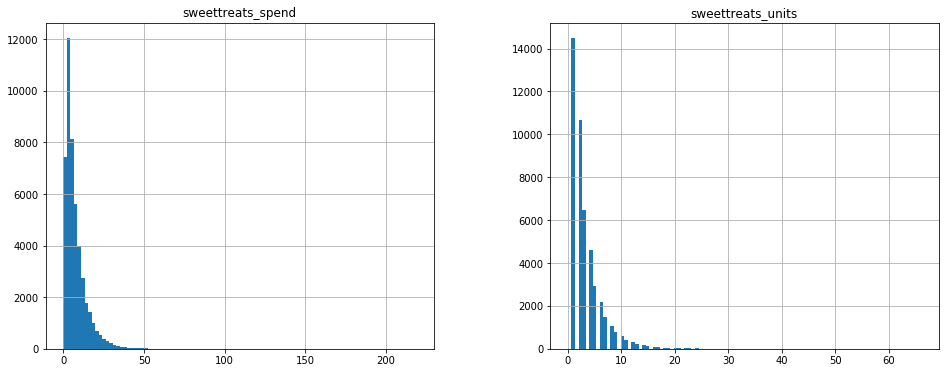

In [20]:

df_sweettreats.hist(bins=100, figsize=(16,6))

In [21]:
df_sweettreats.describe()

,sweettreats_spend,sweettreats_units
count,46975.000000,46975.000000
mean,7.586718,3.370623
std,7.316190,3.197557
min,0.010000,0.000000
25%,2.970000,1.000000
50%,5.370000,2.000000
75%,9.770000,4.000000
max,218.700000,66.000000


In [22]:
df_sweettreats.groupby(['hhid']).agg(['count']).describe()

,sweettreats_spend,sweettreats_units
,count,count
count,10838.000000,10838.000000
mean,4.334287,4.334287
std,2.781779,2.781779
min,1.000000,1.000000
25%,2.000000,2.000000
50%,4.000000,4.000000
75%,6.000000,6.000000
max,12.000000,12.000000


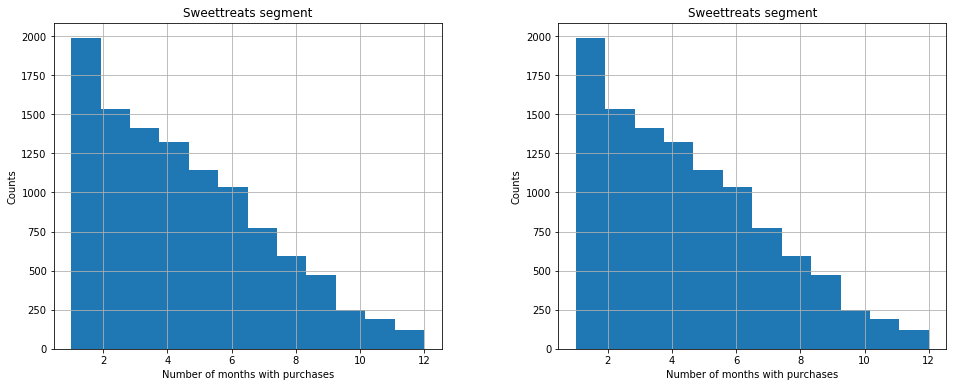

In [23]:
#distribution of months with purchase in segment
axarr = df_sweettreats.groupby(['hhid']).agg(['count']).hist(bins=12, figsize=(16,6))
for ax in axarr.flatten():
    ax.set_xlabel("Number of months with purchases")
    ax.set_ylabel("Counts")
    ax.set_title("Sweettreats segment")

In [24]:
#load the flavorfirst segment file

In [25]:
df_flavorfirst = pd.read_csv('data_2020-06-09/flavorfirst_month.csv.gz')

In [26]:
df_flavorfirst.shape

(55937, 4)

In [27]:
df_flavorfirst.head()

,NLSN_HHID,MONTH,TOTAL_SPEND,TOTAL_UNITS
0,10112,2019-03,1.00,2.0
1,10313,2019-06,3.28,2.0
2,10372,2020-01,6.08,4.0
3,10372,2019-11,14.54,6.0
4,10372,2019-09,3.19,1.0


In [28]:
df_flavorfirst = df_flavorfirst.rename(columns={"NLSN_HHID": "hhid", "TOTAL_SPEND": "flavorfirst_spend", "TOTAL_UNITS": "flavorfirst_units"}).set_index(['hhid','MONTH'])
df_flavorfirst.head()

flavorfirst_spend  flavorfirst_units
hhid  MONTH                                        
10112 2019-03               1.00                2.0
10313 2019-06               3.28                2.0
10372 2020-01               6.08                4.0
      2019-11              14.54                6.0
      2019-09               3.19                1.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7635a1e8e0>,
      dtype=object)

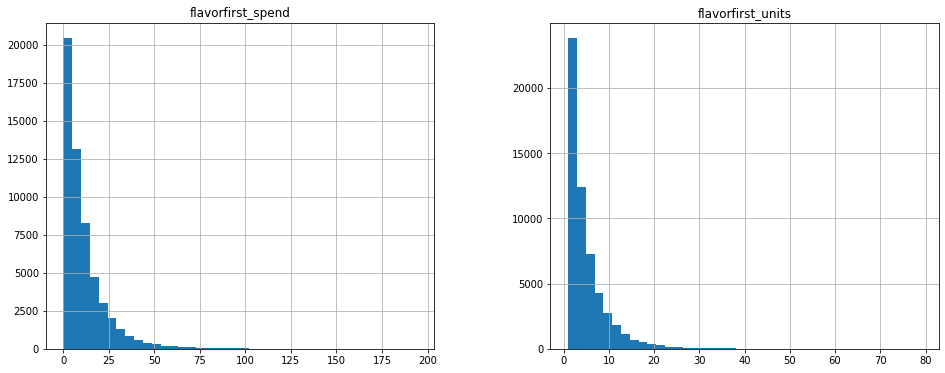

In [29]:
df_flavorfirst.hist(bins=40, figsize=(16,6))

In [30]:
df_flavorfirst.describe()

,flavorfirst_spend,flavorfirst_units
count,55937.000000,55937.000000
mean,11.564020,4.684820
std,12.595264,4.768858
min,0.250000,1.000000
25%,3.580000,2.000000
50%,7.500000,3.000000
75%,14.850000,6.000000
max,193.820000,79.000000


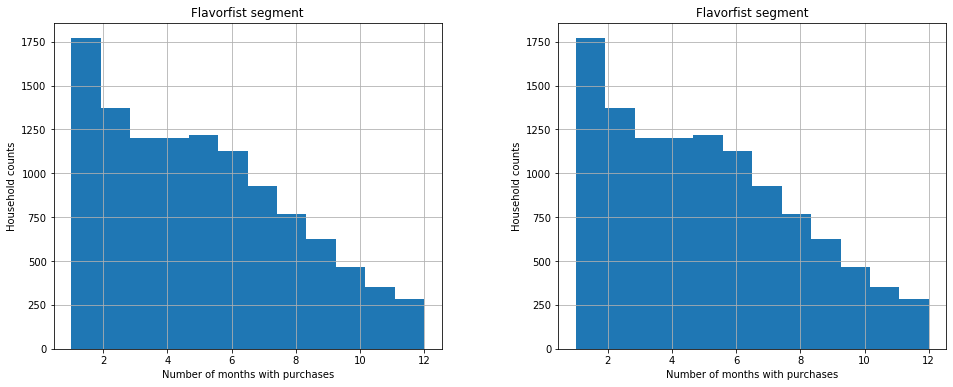

In [31]:
#distribution of months with purchase in segment
axarr = df_flavorfirst.groupby(['hhid']).agg(['count']).hist(bins=12, figsize=(16,6))
for ax in axarr.flatten():
    ax.set_xlabel("Number of months with purchases")
    ax.set_ylabel("Household counts")
    ax.set_title("Flavorfist segment")

In [32]:
df_flavorfirst.shape

(55937, 2)

In [33]:
#load the modernhealth segment file

In [34]:
df_modernhealth = pd.read_csv('data_2020-06-09/modernhealth_month.csv.gz')

In [35]:
df_modernhealth.shape

(15811, 4)

In [36]:
df_modernhealth.head()

,NLSN_HHID,MONTH,TOTAL_SPEND,TOTAL_UNITS
0,10372,2019-10,45.85,5
1,10372,2019-05,91.23,12
2,10802,2019-10,14.07,3
3,10802,2019-09,4.79,1
4,10802,2019-08,21.56,4


In [37]:
df_modernhealth = df_modernhealth.rename(columns={"NLSN_HHID": "hhid", "TOTAL_SPEND": "modernhealth_spend", "TOTAL_UNITS": "modernhealth_units"}).set_index(['hhid','MONTH'])
df_modernhealth.head()

modernhealth_spend  modernhealth_units
hhid  MONTH                                          
10372 2019-10               45.85                   5
      2019-05               91.23                  12
10802 2019-10               14.07                   3
      2019-09                4.79                   1
      2019-08               21.56                   4

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7635794b80>,
      dtype=object)

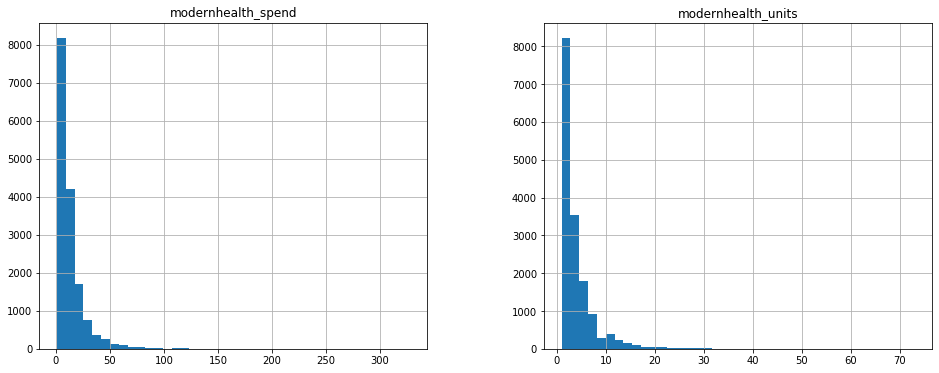

In [38]:
df_modernhealth.hist(bins=40, figsize=(16,6))

In [39]:
df_modernhealth.describe()

,modernhealth_spend,modernhealth_units
count,15811.000000,15811.000000
mean,12.840854,3.720891
std,13.462726,3.865229
min,0.990000,1.000000
25%,4.990000,1.000000
50%,8.970000,2.000000
75%,15.525000,5.000000
max,327.540000,73.000000


In [40]:
df_modernhealth.groupby(['hhid']).agg(['mean', 'count','sum'])

modernhealth_spend               modernhealth_units           
                      mean count     sum               mean count  sum
hhid                                                                  
10372            68.540000     2  137.08           8.500000     2   17
10802            15.864000     5   79.32           3.400000     5   17
10853             9.790000     1    9.79           1.000000     1    1
10880            62.475714     7  437.33          14.285714     7  100
11001            10.500000     6   63.00           4.166667     6   25
...                    ...   ...     ...                ...   ...  ...
6481510          10.480000     2   20.96           4.000000     2    8
6481530          15.612500     4   62.45           4.000000     4   16
6481570          14.340000     1   14.34           6.000000     1    6
6481620           2.000000     1    2.00           1.000000     1    1
6481650           2.520000     1    2.52           1.000000     1    1

[7427 rows x 6 columns]

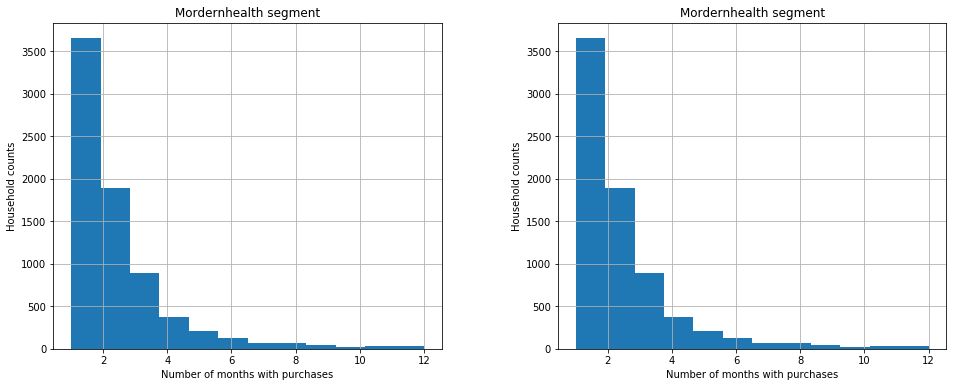

In [41]:
#distribution of months with purchase in segment
axarr = df_modernhealth.groupby(['hhid']).agg(['count']).hist(bins=12, figsize=(16,6))
for ax in axarr.flatten():
    ax.set_xlabel("Number of months with purchases")
    ax.set_ylabel("Household counts")
    ax.set_title("Mordernhealth segment")

In [42]:
df_modernhealth.shape

(15811, 2)

In [43]:
# combine all segments

In [44]:
df_segments = df_sweettreats.join(df_flavorfirst, how='outer').join(df_modernhealth, how='outer')

In [45]:
df_segments.shape

(73356, 6)

In [46]:
df_segments.head()

sweettreats_spend  sweettreats_units  flavorfirst_spend  \
hhid  MONTH                                                              
10112 2019-03               2.00                2.0               1.00   
10271 2019-09               8.99                7.0                NaN   
10313 2019-06               7.96                7.0               3.28   
10372 2019-03               2.00                2.0              33.90   
      2019-05                NaN                NaN                NaN   

               flavorfirst_units  modernhealth_spend  modernhealth_units  
hhid  MONTH                                                               
10112 2019-03                2.0                 NaN                 NaN  
10271 2019-09                NaN                 NaN                 NaN  
10313 2019-06                2.0                 NaN                 NaN  
10372 2019-03               14.0                 NaN                 NaN  
      2019-05                NaN               91.23                12.0

In [47]:
df_agg_year_stat = df_segments.groupby(['hhid']).agg(['count','sum'])

In [48]:
df_agg_year_stat

sweettreats_spend        sweettreats_units       flavorfirst_spend  \
                    count    sum             count   sum             count   
hhid                                                                         
10112                   1   2.00                 1   2.0                 1   
10271                   1   8.99                 1   7.0                 0   
10313                   1   7.96                 1   7.0                 1   
10372                   5  26.60                 5  16.0                 5   
10441                   0   0.00                 0   0.0                 1   
...                   ...    ...               ...   ...               ...   
6481660                 1   3.79                 1   1.0                 1   
6481731                 1   1.96                 1   2.0                 0   
6481761                 8  50.61                 8  25.0                 7   
6516946                 0   0.00                 0   0.0                 1   
6516947                 4  14.08                 4   7.0                 2   

                flavorfirst_units       modernhealth_spend          \
            sum             count   sum              count     sum   
hhid                                                                 
10112      1.00                 1   2.0                  0    0.00   
10271      0.00                 0   0.0                  0    0.00   
10313      3.28                 1   2.0                  0    0.00   
10372     58.71                 5  26.0                  2  137.08   
10441     11.68                 1   2.0                  0    0.00   
...         ...               ...   ...                ...     ...   
6481660    3.00                 1   2.0                  0    0.00   
6481731    0.00                 0   0.0                  0    0.00   
6481761  102.50                 7  45.0                  0    0.00   
6516946    3.58                 1   1.0                  0    0.00   
6516947    2.32                 2   2.0                  0    0.00   

        modernhealth_units        
                     count   sum  
hhid                              
10112                    0   0.0  
10271                    0   0.0  
10313                    0   0.0  
10372                    2  17.0  
10441                    0   0.0  
...                    ...   ...  
6481660                  0   0.0  
6481731                  0   0.0  
6481761                  0   0.0  
6516946                  0   0.0  
6516947                  0   0.0  

[11843 rows x 12 columns]

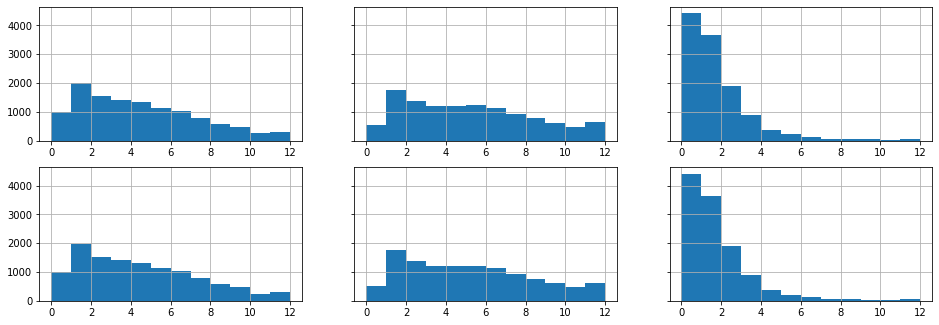

In [49]:
#confirm distribution of months with purchase in all segments by checking both spend and units
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 6), sharey=True)
fig.subplots_adjust(bottom=0.2)
n_bins = 12
for i in range(3):   
#     print(i)
    var = ['sweettreats','flavorfirst','modernhealth']
    df_agg_year_stat[var[i]+'_spend']['count'].hist(figsize = (16,6),bins=12,ax=axes[0,i])
    df_agg_year_stat[var[i]+'_units']['count'].hist(figsize = (16,6),bins=12,ax=axes[1,i])

In [50]:
#aggregate monthly value to yearly level
df_year_agg = df_segments.groupby(['hhid']).sum()

In [51]:
df_year_agg.head()

,sweettreats_spend,sweettreats_units,flavorfirst_spend,flavorfirst_units,modernhealth_spend,modernhealth_units
hhid,,,,,,
10112,2.00,2.0,1.00,2.0,0.00,0.0
10271,8.99,7.0,0.00,0.0,0.00,0.0
10313,7.96,7.0,3.28,2.0,0.00,0.0
10372,26.60,16.0,58.71,26.0,137.08,17.0
10441,0.00,0.0,11.68,2.0,0.00,0.0


In [52]:
df_year_agg.shape

(11843, 6)

In [53]:
df_year_agg.describe()

,sweettreats_spend,sweettreats_units,flavorfirst_spend,flavorfirst_units,modernhealth_spend,modernhealth_units
count,11843.00000,11843.000000,11843.000000,11843.000000,11843.000000,11843.000000
mean,30.09255,13.369501,54.619316,22.127396,17.143186,4.967576
std,34.90686,15.440974,68.953090,25.608169,37.747712,10.544825
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.28000,3.000000,13.795000,6.000000,0.000000,0.000000
50%,19.93000,9.000000,35.010000,15.000000,6.050000,2.000000
75%,40.16000,18.000000,69.460000,29.000000,20.120000,6.000000
max,550.36000,284.000000,1394.600000,415.000000,811.180000,283.000000


In [54]:
#review segments 
df_segments.head()

sweettreats_spend  sweettreats_units  flavorfirst_spend  \
hhid  MONTH                                                              
10112 2019-03               2.00                2.0               1.00   
10271 2019-09               8.99                7.0                NaN   
10313 2019-06               7.96                7.0               3.28   
10372 2019-03               2.00                2.0              33.90   
      2019-05                NaN                NaN                NaN   

               flavorfirst_units  modernhealth_spend  modernhealth_units  
hhid  MONTH                                                               
10112 2019-03                2.0                 NaN                 NaN  
10271 2019-09                NaN                 NaN                 NaN  
10313 2019-06                2.0                 NaN                 NaN  
10372 2019-03               14.0                 NaN                 NaN  
      2019-05                NaN               91.23                12.0

In [55]:

df_segments.corr()

,sweettreats_spend,sweettreats_units,flavorfirst_spend,flavorfirst_units,modernhealth_spend,modernhealth_units
sweettreats_spend,1.000000,0.836597,0.168536,0.145694,0.035922,0.026545
sweettreats_units,0.836597,1.000000,0.130006,0.148458,0.005230,0.019754
flavorfirst_spend,0.168536,0.130006,1.000000,0.835458,0.107476,0.137892
flavorfirst_units,0.145694,0.148458,0.835458,1.000000,0.080892,0.134957
modernhealth_spend,0.035922,0.005230,0.107476,0.080892,1.000000,0.878423
modernhealth_units,0.026545,0.019754,0.137892,0.134957,0.878423,1.000000


In [56]:
df_segments.describe()

,sweettreats_spend,sweettreats_units,flavorfirst_spend,flavorfirst_units,modernhealth_spend,modernhealth_units
count,46975.000000,46975.000000,55937.000000,55937.000000,15811.000000,15811.000000
mean,7.586718,3.370623,11.564020,4.684820,12.840854,3.720891
std,7.316190,3.197557,12.595264,4.768858,13.462726,3.865229
min,0.010000,0.000000,0.250000,1.000000,0.990000,1.000000
25%,2.970000,1.000000,3.580000,2.000000,4.990000,1.000000
50%,5.370000,2.000000,7.500000,3.000000,8.970000,2.000000
75%,9.770000,4.000000,14.850000,6.000000,15.525000,5.000000
max,218.700000,66.000000,193.820000,79.000000,327.540000,73.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7661210be0>,
      dtype=object)

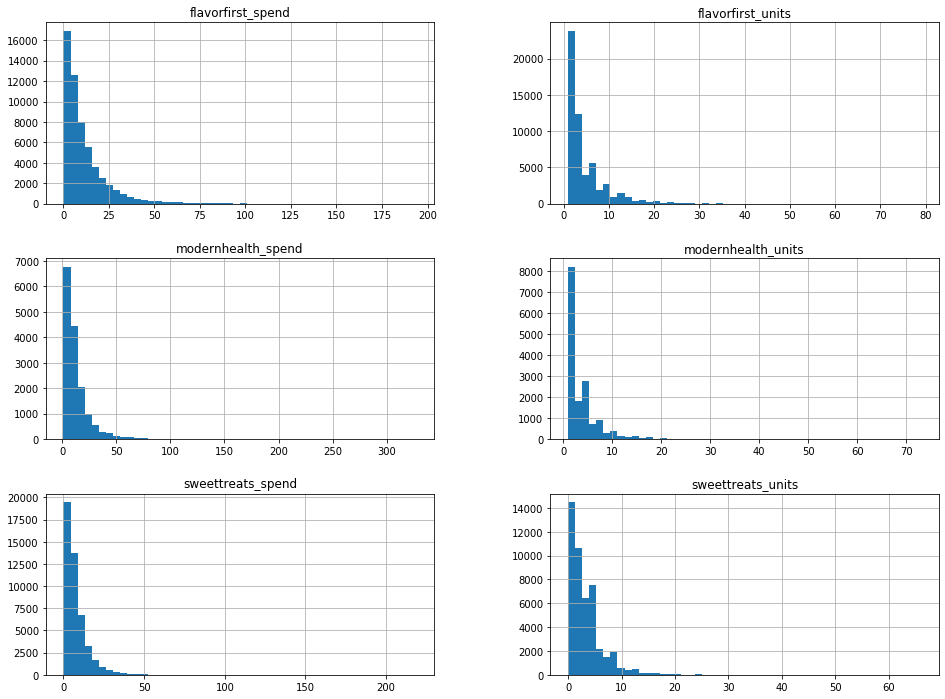

In [57]:
df_segments.hist(bins=50, figsize = (16,12))

In [58]:
#review quotient
df_quotient.head()

TOTAL_SPEND  TOTAL_UNITS
hhid  MONTH                            
10112 2019-03       432.12        192.0
10271 2019-09       385.55        200.0
10313 2019-06       738.78        200.0
10372 2020-02       753.66        180.0
      2020-01       857.62        266.0

In [59]:
#join segment info to all quotient spend, meaning some hh has 0 segments spend
df_quotient_monthly = df_quotient.join(df_segments, how='left')

In [60]:
df_quotient_monthly.index.get_level_values('hhid').nunique()

12455

In [61]:
#check a single hh as example
df_quotient_monthly.loc[10372]

,TOTAL_SPEND,TOTAL_UNITS,sweettreats_spend,sweettreats_units,flavorfirst_spend,flavorfirst_units,modernhealth_spend,modernhealth_units
MONTH,,,,,,,,
2020-02,753.660000,180.0,5.78,2.0,NaN,NaN,NaN,NaN
2020-01,857.620000,266.0,1.51,1.0,6.08,4.0,NaN,NaN
2019-12,698.409999,186.0,6.04,4.0,NaN,NaN,NaN,NaN
2019-11,1182.080000,314.0,NaN,NaN,14.54,6.0,NaN,NaN
2019-10,731.860000,156.0,NaN,NaN,NaN,NaN,45.85,5.0
2019-09,839.210000,153.0,NaN,NaN,3.19,1.0,NaN,NaN
2019-08,620.450000,207.0,NaN,NaN,1.00,1.0,NaN,NaN
2019-07,499.580000,122.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-06,958.340000,240.0,11.27,7.0,NaN,NaN,NaN,NaN


In [62]:
df_quotient_monthly.shape

(97458, 8)

In [63]:
df_quotient_monthly.head()

TOTAL_SPEND  TOTAL_UNITS  sweettreats_spend  sweettreats_units  \
hhid  MONTH                                                                     
10112 2019-03       432.12        192.0               2.00                2.0   
10271 2019-09       385.55        200.0               8.99                7.0   
10313 2019-06       738.78        200.0               7.96                7.0   
10372 2020-02       753.66        180.0               5.78                2.0   
      2020-01       857.62        266.0               1.51                1.0   

               flavorfirst_spend  flavorfirst_units  modernhealth_spend  \
hhid  MONTH                                                               
10112 2019-03               1.00                2.0                 NaN   
10271 2019-09                NaN                NaN                 NaN   
10313 2019-06               3.28                2.0                 NaN   
10372 2020-02                NaN                NaN                 NaN   
      2020-01               6.08                4.0                 NaN   

               modernhealth_units  
hhid  MONTH                        
10112 2019-03                 NaN  
10271 2019-09                 NaN  
10313 2019-06                 NaN  
10372 2020-02                 NaN  
      2020-01                 NaN

In [64]:
df_quotient_monthly.loc[10372]

,TOTAL_SPEND,TOTAL_UNITS,sweettreats_spend,sweettreats_units,flavorfirst_spend,flavorfirst_units,modernhealth_spend,modernhealth_units
MONTH,,,,,,,,
2020-02,753.660000,180.0,5.78,2.0,NaN,NaN,NaN,NaN
2020-01,857.620000,266.0,1.51,1.0,6.08,4.0,NaN,NaN
2019-12,698.409999,186.0,6.04,4.0,NaN,NaN,NaN,NaN
2019-11,1182.080000,314.0,NaN,NaN,14.54,6.0,NaN,NaN
2019-10,731.860000,156.0,NaN,NaN,NaN,NaN,45.85,5.0
2019-09,839.210000,153.0,NaN,NaN,3.19,1.0,NaN,NaN
2019-08,620.450000,207.0,NaN,NaN,1.00,1.0,NaN,NaN
2019-07,499.580000,122.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-06,958.340000,240.0,11.27,7.0,NaN,NaN,NaN,NaN


In [65]:
#aggreate all in segment and out of segment info to yearly level
df_quotient_agg = df_quotient_monthly.groupby(['hhid']).agg(['sum','count'])

In [66]:
df_quotient_agg.columns = ["_".join(x) for x in df_quotient_agg.columns.ravel()]

In [67]:
df_quotient_agg.head()

,TOTAL_SPEND_sum,TOTAL_SPEND_count,TOTAL_UNITS_sum,TOTAL_UNITS_count,sweettreats_spend_sum,sweettreats_spend_count,sweettreats_units_sum,sweettreats_units_count,flavorfirst_spend_sum,flavorfirst_spend_count,flavorfirst_units_sum,flavorfirst_units_count,modernhealth_spend_sum,modernhealth_spend_count,modernhealth_units_sum,modernhealth_units_count
hhid,,,,,,,,,,,,,,,,
10112,432.120000,1,192.0,1,2.00,1,2.0,1,1.00,1,2.0,1,0.00,0,0.0,0
10271,385.550000,1,200.0,1,8.99,1,7.0,1,0.00,0,0.0,0,0.00,0,0.0,0
10313,738.780000,1,200.0,1,7.96,1,7.0,1,3.28,1,2.0,1,0.00,0,0.0,0
10372,9564.489999,12,2403.0,12,26.60,5,16.0,5,58.71,5,26.0,5,137.08,2,17.0,2
10441,257.400000,1,62.0,1,0.00,0,0.0,0,11.68,1,2.0,1,0.00,0,0.0,0


In [68]:
df_quotient_agg

,TOTAL_SPEND_sum,TOTAL_SPEND_count,TOTAL_UNITS_sum,TOTAL_UNITS_count,sweettreats_spend_sum,sweettreats_spend_count,sweettreats_units_sum,sweettreats_units_count,flavorfirst_spend_sum,flavorfirst_spend_count,flavorfirst_units_sum,flavorfirst_units_count,modernhealth_spend_sum,modernhealth_spend_count,modernhealth_units_sum,modernhealth_units_count
hhid,,,,,,,,,,,,,,,,
10112,432.120000,1,192.0,1,2.00,1,2.0,1,1.00,1,2.0,1,0.00,0,0.0,0
10271,385.550000,1,200.0,1,8.99,1,7.0,1,0.00,0,0.0,0,0.00,0,0.0,0
10313,738.780000,1,200.0,1,7.96,1,7.0,1,3.28,1,2.0,1,0.00,0,0.0,0
10372,9564.489999,12,2403.0,12,26.60,5,16.0,5,58.71,5,26.0,5,137.08,2,17.0,2
10441,257.400000,1,62.0,1,0.00,0,0.0,0,11.68,1,2.0,1,0.00,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6481731,409.900000,2,103.0,2,1.96,1,2.0,1,0.00,0,0.0,0,0.00,0,0.0,0
6481761,5170.210000,12,1655.0,12,50.61,8,25.0,8,102.50,7,45.0,7,0.00,0,0.0,0
6481770,187.030000,1,40.0,1,0.00,0,0.0,0,0.00,0,0.0,0,0.00,0,0.0,0


In [69]:
df_quotient_agg.shape

(12455, 16)

In [70]:
df_hh_demo.head()

,designated_market_area_rank,local_county_size_code,residence_in_metro_county_flag,prizm_segment_nickname,psycle_segment_nickname,connexions_segment_nickname,spectra_reportable_classification_code,residence_ownership_status_desc,residence_structure_type_code,owns_secondary_residence_flag,...,number_of_android_os_smartphones_that_are_operable,number_of_other_os_smartphones_that_are_operable,count_svod_subscriptions,netflix_subscription_indicator,svod_Netflix,svod_Hulu,svod_Amazon,ott_ownership_flag,has_smart_tv_flag,countintab
hhid,,,,,,,,,,,,,,,,,,,,,
11458,9,B,N,White Picket Fences,Savvy Savers,Tech Skeptics,00,Owned,1,N,...,0.0,0.0,NaN,None,None,None,None,None,None,245
12027,9,B,N,Up-and-Comers,Home Sweet Equity,Cinemaniacs,00,Owned,2,N,...,NaN,NaN,NaN,None,None,None,None,None,None,292
14450,9,A,Y,Upward Bound,ATM Nation,Kids & Keyboards,00,Rented,1,N,...,0.0,0.0,3.0,Y,Y,Y,Y,Y,Y,143
14570,9,A,Y,Aspiring A-Listers,School Daze,Calling Circles,00,Rented,1,N,...,0.0,0.0,3.0,Y,Y,Y,Y,Y,Y,72
14832,9,A,Y,Executive Suites,Midlife Highlife,You & I Tunes,00,Owned,2,N,...,2.0,0.0,2.0,Y,Y,N,Y,Y,N,315


In [71]:
#merge for hh which has both demo and spend info
df_common_hh_agg_complete = df_hh_demo.join(df_quotient_agg, how='inner')

In [72]:
df_common_hh_agg_complete.head()

,designated_market_area_rank,local_county_size_code,residence_in_metro_county_flag,prizm_segment_nickname,psycle_segment_nickname,connexions_segment_nickname,spectra_reportable_classification_code,residence_ownership_status_desc,residence_structure_type_code,owns_secondary_residence_flag,...,sweettreats_units_sum,sweettreats_units_count,flavorfirst_spend_sum,flavorfirst_spend_count,flavorfirst_units_sum,flavorfirst_units_count,modernhealth_spend_sum,modernhealth_spend_count,modernhealth_units_sum,modernhealth_units_count
hhid,,,,,,,,,,,,,,,,,,,,,
15619,9,A,Y,Winner's Circle,Bargain Lovers,The Pragmatics,00,Owned,1,N,...,10.0,5,51.17,9,23.0,9,35.04,3,10.0,3
15790,9,A,Y,Movers & Shakers,Business Class,Analoggers,00,Owned,1,N,...,10.0,4,22.05,4,8.0,4,28.63,2,9.0,2
18024,9,A,Y,Upper Crust,Business Class,Analoggers,00,Owned,1,Y,...,11.0,5,34.91,3,14.0,3,31.95,1,13.0,1
21220,2,A,Y,Money & Brains,Safe at Home,Broadband Boulevards,00,Owned,1,N,...,0.0,0,7.63,2,6.0,2,0.00,0,0.0,0
25517,2,A,Y,Middleburg Managers,Family Fortunes,Technovators,00,Owned,1,N,...,5.0,1,0.00,0,0.0,0,29.95,1,5.0,1


In [73]:
df_common_hh_agg_complete = df_common_hh_agg_complete.rename(columns={"sweettreats_units_sum": "sweettreats_units", 
                        "sweettreats_spend_sum": "sweettreats_spend",
                        'sweettreats_units_count':'sweettreats_count',
                        'flavorfirst_spend_sum':'flavorfirst_spend', 
                        'flavorfirst_units_sum':'flavorfirst_units',
                        'flavorfirst_units_count': 'flavorfirst_count',
                        'modernhealth_spend_sum':'modernhealth_spend',
                        'modernhealth_units_sum':'modernhealth_units',
                        'modernhealth_units_count':'modernhealth_count',
                        'TOTAL_UNITS_sum':'total_units',
                        'TOTAL_SPEND_sum':'total_spend',
                        'TOTAL_UNITS_count':'total_count'})\
        .drop(columns=['sweettreats_spend_count',
                       'flavorfirst_spend_count',
                       'modernhealth_spend_count',
                       'TOTAL_SPEND_count'])

In [74]:
df_common_hh_agg_complete.head()

,designated_market_area_rank,local_county_size_code,residence_in_metro_county_flag,prizm_segment_nickname,psycle_segment_nickname,connexions_segment_nickname,spectra_reportable_classification_code,residence_ownership_status_desc,residence_structure_type_code,owns_secondary_residence_flag,...,total_count,sweettreats_spend,sweettreats_units,sweettreats_count,flavorfirst_spend,flavorfirst_units,flavorfirst_count,modernhealth_spend,modernhealth_units,modernhealth_count
hhid,,,,,,,,,,,,,,,,,,,,,
15619,9,A,Y,Winner's Circle,Bargain Lovers,The Pragmatics,00,Owned,1,N,...,12,23.37,10.0,5,51.17,23.0,9,35.04,10.0,3
15790,9,A,Y,Movers & Shakers,Business Class,Analoggers,00,Owned,1,N,...,11,22.31,10.0,4,22.05,8.0,4,28.63,9.0,2
18024,9,A,Y,Upper Crust,Business Class,Analoggers,00,Owned,1,Y,...,8,29.18,11.0,5,34.91,14.0,3,31.95,13.0,1
21220,2,A,Y,Money & Brains,Safe at Home,Broadband Boulevards,00,Owned,1,N,...,3,0.00,0.0,0,7.63,6.0,2,0.00,0.0,0
25517,2,A,Y,Middleburg Managers,Family Fortunes,Technovators,00,Owned,1,N,...,5,9.75,5.0,1,0.00,0.0,0,29.95,5.0,1


In [75]:
#fraction of 0 values
target_var_list = ['sweettreats_spend','sweettreats_units','flavorfirst_spend','flavorfirst_units','modernhealth_spend','modernhealth_units']
1-df_common_hh_agg_complete[target_var_list].astype(bool).sum(axis=0)/len(df_common_hh_agg_complete[target_var_list])

sweettreats_spend     0.130216
sweettreats_units     0.130216
flavorfirst_spend     0.090505
flavorfirst_units     0.090505
modernhealth_spend    0.401478
modernhealth_units    0.401478
dtype: float64

In [76]:
#save file
df_common_hh_agg_complete.to_csv('df_common_hh_agg_complete.csv')

In [77]:
#remove null values

In [78]:
df_na = df_common_hh_agg_complete.loc[df_common_hh_agg_complete.isnull().any(axis=1), df_common_hh_agg_complete.isna().any(axis=0)]

In [79]:
df_na.isnull().sum()

purchased_new_car_in_current_model_year_flag          4177
number_of_pcs_that_are_operable                       1595
number_of_mac_os_pcs_that_are_operable                1595
number_of_windows_os_pcs_that_are_operable            1595
number_of_desktop_pcs_that_are_operable               1595
number_of_laptop_pcs_that_are_operable                1595
number_of_tablet_pcs_that_are_operable                2594
number_of_ipad_os_pcs_that_are_operable               2594
number_of_android_os_tablet_pcs_that_are_operable     2594
number_of_other_os_tablet_pcs_that_are_operable       2594
number_of_smartphones_that_are_operable               2594
number_of_ios_os_smartphones_that_are_operable        2594
number_of_android_os_smartphones_that_are_operable    2594
number_of_other_os_smartphones_that_are_operable      2594
count_svod_subscriptions                              2994
netflix_subscription_indicator                        3928
svod_Netflix                                          26

In [80]:
df_na.shape

(8417, 21)

In [81]:
df_na.head()

,purchased_new_car_in_current_model_year_flag,number_of_pcs_that_are_operable,number_of_mac_os_pcs_that_are_operable,number_of_windows_os_pcs_that_are_operable,number_of_desktop_pcs_that_are_operable,number_of_laptop_pcs_that_are_operable,number_of_tablet_pcs_that_are_operable,number_of_ipad_os_pcs_that_are_operable,number_of_android_os_tablet_pcs_that_are_operable,number_of_other_os_tablet_pcs_that_are_operable,...,number_of_ios_os_smartphones_that_are_operable,number_of_android_os_smartphones_that_are_operable,number_of_other_os_smartphones_that_are_operable,count_svod_subscriptions,netflix_subscription_indicator,svod_Netflix,svod_Hulu,svod_Amazon,ott_ownership_flag,has_smart_tv_flag
hhid,,,,,,,,,,,,,,,,,,,,,
15619,None,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,Y,Y,N,Y,None,None
21220,N,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,Y,Y,N,Y,Y,N
26087,N,2.0,0.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,Y,Y,N,Y,Y,Y
33602,None,5.0,0.0,5.0,2.0,3.0,3.0,0.0,3.0,0.0,...,1.0,0.0,1.0,2.0,Y,Y,N,Y,N,Y
218175,None,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,4.0,0.0,0.0,3.0,Y,Y,Y,Y,Y,Y


In [82]:
df_common_hh_agg_complete_clean = df_common_hh_agg_complete.loc[:,~df_common_hh_agg_complete.columns.isin(df_na.columns)]

In [86]:
#fraction of 0 values
target_var_list = ['sweettreats_spend','sweettreats_units','sweettreats_count',
                   'flavorfirst_spend','flavorfirst_units', 'flavorfirst_count',
                   'modernhealth_spend','modernhealth_units', 'modernhealth_count']
1-df_common_hh_agg_complete_clean[target_var_list].astype(bool).sum(axis=0)/len(df_common_hh_agg_complete_clean[target_var_list])

sweettreats_spend     0.130216
sweettreats_units     0.130216
sweettreats_count     0.130216
flavorfirst_spend     0.090505
flavorfirst_units     0.090505
flavorfirst_count     0.090505
modernhealth_spend    0.401478
modernhealth_units    0.401478
modernhealth_count    0.401478
dtype: float64

In [87]:
#check null values
df_common_hh_agg_complete_clean.isnull().sum().sum() 

0

In [88]:
#save dataset
df_common_hh_agg_complete_clean.to_csv('df_common_hh_agg_complete_clean.csv')

In [89]:
#Alternatively, Do not aggregate to yearly level, but rather use monthly data to model
#merge demo and spend info on monthly level

In [90]:
df_hh_demo

,designated_market_area_rank,local_county_size_code,residence_in_metro_county_flag,prizm_segment_nickname,psycle_segment_nickname,connexions_segment_nickname,spectra_reportable_classification_code,residence_ownership_status_desc,residence_structure_type_code,owns_secondary_residence_flag,...,number_of_android_os_smartphones_that_are_operable,number_of_other_os_smartphones_that_are_operable,count_svod_subscriptions,netflix_subscription_indicator,svod_Netflix,svod_Hulu,svod_Amazon,ott_ownership_flag,has_smart_tv_flag,countintab
hhid,,,,,,,,,,,,,,,,,,,,,
11458,9,B,N,White Picket Fences,Savvy Savers,Tech Skeptics,00,Owned,1,N,...,0.0,0.0,NaN,None,None,None,None,None,None,245
12027,9,B,N,Up-and-Comers,Home Sweet Equity,Cinemaniacs,00,Owned,2,N,...,NaN,NaN,NaN,None,None,None,None,None,None,292
14450,9,A,Y,Upward Bound,ATM Nation,Kids & Keyboards,00,Rented,1,N,...,0.0,0.0,3.0,Y,Y,Y,Y,Y,Y,143
14570,9,A,Y,Aspiring A-Listers,School Daze,Calling Circles,00,Rented,1,N,...,0.0,0.0,3.0,Y,Y,Y,Y,Y,Y,72
14832,9,A,Y,Executive Suites,Midlife Highlife,You & I Tunes,00,Owned,2,N,...,2.0,0.0,2.0,Y,Y,N,Y,Y,N,315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8886846,55,B,Y,Generation Web,Young Urban Renters,IM Nation,00,Rented,2,N,...,1.0,0.0,3.0,Y,Y,Y,Y,Y,Y,199
8887313,55,B,Y,Country Casuals,Home Sweet Equity,Internet Hinterlands,00,Owned,1,Y,...,NaN,NaN,1.0,Y,Y,N,N,Y,Y,130
8893159,60,B,Y,"Kid Country, USA",Family Sprawl,Tech Nests,00,Owned,1,N,...,1.0,0.0,2.0,Y,Y,N,Y,None,None,293


In [114]:
df_common_hh_monthly_complete = df_hh_demo.join(df_quotient_monthly, how='inner')

In [115]:
df_common_hh_monthly_complete = df_common_hh_monthly_complete.rename(
               columns={"TOTAL_SPEND": "monthly_spend", 
                        "TOTAL_UNITS": "monthly_units",
                        })

In [116]:
target_var_list = ['monthly_spend','monthly_units','sweettreats_spend','sweettreats_units','flavorfirst_spend','flavorfirst_units','modernhealth_spend','modernhealth_units']
df_common_hh_monthly_complete[target_var_list] = df_common_hh_monthly_complete[target_var_list].fillna(0)

In [117]:
df_common_hh_monthly_complete.loc[10372,target_var_list]

,monthly_spend,monthly_units,sweettreats_spend,sweettreats_units,flavorfirst_spend,flavorfirst_units,modernhealth_spend,modernhealth_units
MONTH,,,,,,,,
2020-02,753.660000,180.0,5.78,2.0,0.00,0.0,0.00,0.0
2020-01,857.620000,266.0,1.51,1.0,6.08,4.0,0.00,0.0
2019-12,698.409999,186.0,6.04,4.0,0.00,0.0,0.00,0.0
2019-11,1182.080000,314.0,0.00,0.0,14.54,6.0,0.00,0.0
2019-10,731.860000,156.0,0.00,0.0,0.00,0.0,45.85,5.0
2019-09,839.210000,153.0,0.00,0.0,3.19,1.0,0.00,0.0
2019-08,620.450000,207.0,0.00,0.0,1.00,1.0,0.00,0.0
2019-07,499.580000,122.0,0.00,0.0,0.00,0.0,0.00,0.0
2019-06,958.340000,240.0,11.27,7.0,0.00,0.0,0.00,0.0


In [118]:
df_common_hh_monthly_complete.shape

(93457, 105)

In [119]:
df_segments.columns

Index(['sweettreats_spend', 'sweettreats_units', 'flavorfirst_spend',
       'flavorfirst_units', 'modernhealth_spend', 'modernhealth_units'],
      dtype='object')

In [120]:
df_common_hh_monthly_complete.head()

designated_market_area_rank local_county_size_code  \
hhid  MONTH                                                         
10112 2019-03                            9                      B   
10271 2019-09                            9                      A   
10313 2019-06                            9                      A   
10372 2020-02                            9                      A   
      2020-01                            9                      A   

              residence_in_metro_county_flag prizm_segment_nickname  \
hhid  MONTH                                                           
10112 2019-03                              N        Country Squires   
10271 2019-09                              Y           Upward Bound   
10313 2019-06                              Y    Big Fish,Small Pond   
10372 2020-02                              Y        Country Squires   
      2020-01                              Y        Country Squires   

              psycle_segment_nickname connexions_segment_nickname  \
hhid  MONTH                                                         
10112 2019-03               New Money                  Tech Nests   
10271 2019-09        Payday Prospects              New Technorati   
10313 2019-06    Capital Accumulators           Low-Speed Boomers   
10372 2020-02        Midlife Highlife         Plugged-In Families   
      2020-01        Midlife Highlife         Plugged-In Families   

              spectra_reportable_classification_code  \
hhid  MONTH                                            
10112 2019-03                                     00   
10271 2019-09                                     00   
10313 2019-06                                     00   
10372 2020-02                                     00   
      2020-01                                     00   

              residence_ownership_status_desc  residence_structure_type_code  \
hhid  MONTH                                                                    
10112 2019-03                           Owned                              1   
10271 2019-09                           Owned                              1   
10313 2019-06                           Owned                              1   
10372 2020-02                           Owned                              1   
      2020-01                           Owned                              1   

              owns_secondary_residence_flag  ... has_smart_tv_flag countintab  \
hhid  MONTH                                  ...                                
10112 2019-03                             N  ...                 Y        174   
10271 2019-09                             N  ...                 Y         99   
10313 2019-06                             N  ...                 Y        338   
10372 2020-02                             N  ...                 N         76   
      2020-01                             N  ...                 N         76   

              monthly_spend monthly_units sweettreats_spend sweettreats_units  \
hhid  MONTH                                                                     
10112 2019-03        432.12         192.0              2.00               2.0   
10271 2019-09        385.55         200.0              8.99               7.0   
10313 2019-06        738.78         200.0              7.96               7.0   
10372 2020-02        753.66         180.0              5.78               2.0   
      2020-01        857.62         266.0              1.51               1.0   

              flavorfirst_spend  flavorfirst_units modernhealth_spend  \
hhid  MONTH                                                             
10112 2019-03              1.00                2.0                0.0   
10271 2019-09              0.00                0.0                0.0   
10313 2019-06              3.28                2.0                0.0   
10372 2020-02              0.00                0.0                0.0   
      2020-01        

In [121]:
#fraction of 0 values
target_var_list = ['monthly_spend','monthly_units','sweettreats_spend','sweettreats_units','flavorfirst_spend','flavorfirst_units','modernhealth_spend','modernhealth_units']
1-df_common_hh_monthly_complete[target_var_list].astype(bool).sum(axis=0)/len(df_common_hh_monthly_complete[target_var_list])

monthly_spend         0.000000
monthly_units         0.000000
sweettreats_spend     0.518335
sweettreats_units     0.518356
flavorfirst_spend     0.425875
flavorfirst_units     0.425875
modernhealth_spend    0.837669
modernhealth_units    0.837669
dtype: float64

In [122]:
df_common_hh_monthly_complete.to_csv('df_common_hh_monthly_complete.csv')

In [123]:
# clean NA values

In [124]:
df_na = df_common_hh_monthly_complete.loc[df_common_hh_monthly_complete.isnull().any(axis=1), df_common_hh_monthly_complete.isna().any(axis=0)]

In [125]:
df_na.head()

,,purchased_new_car_in_current_model_year_flag,number_of_pcs_that_are_operable,number_of_mac_os_pcs_that_are_operable,number_of_windows_os_pcs_that_are_operable,number_of_desktop_pcs_that_are_operable,number_of_laptop_pcs_that_are_operable,number_of_tablet_pcs_that_are_operable,number_of_ipad_os_pcs_that_are_operable,number_of_android_os_tablet_pcs_that_are_operable,number_of_other_os_tablet_pcs_that_are_operable,...,number_of_ios_os_smartphones_that_are_operable,number_of_android_os_smartphones_that_are_operable,number_of_other_os_smartphones_that_are_operable,count_svod_subscriptions,netflix_subscription_indicator,svod_Netflix,svod_Hulu,svod_Amazon,ott_ownership_flag,has_smart_tv_flag
hhid,MONTH,,,,,,,,,,,,,,,,,,,,,
10112,2019-03,None,2.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,...,2.0,0.0,0.0,2.0,Y,Y,N,Y,Y,Y
10271,2019-09,None,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,Y,Y,Y,N,N,Y
10313,2019-06,N,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,Y,Y,N,Y,Y,Y
10441,2019-08,None,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,None,None,None,None,None,None
10599,2020-02,None,2.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,2.0,Y,Y,N,Y,None,None


In [126]:
df_na.isnull().sum()

purchased_new_car_in_current_model_year_flag          32501
number_of_pcs_that_are_operable                       11989
number_of_mac_os_pcs_that_are_operable                11989
number_of_windows_os_pcs_that_are_operable            11989
number_of_desktop_pcs_that_are_operable               11989
number_of_laptop_pcs_that_are_operable                11989
number_of_tablet_pcs_that_are_operable                19834
number_of_ipad_os_pcs_that_are_operable               19834
number_of_android_os_tablet_pcs_that_are_operable     19834
number_of_other_os_tablet_pcs_that_are_operable       19834
number_of_smartphones_that_are_operable               19834
number_of_ios_os_smartphones_that_are_operable        19834
number_of_android_os_smartphones_that_are_operable    19834
number_of_other_os_smartphones_that_are_operable      19834
count_svod_subscriptions                              23302
netflix_subscription_indicator                        30752
svod_Netflix                            

In [127]:
df_na.shape

(65941, 21)

In [128]:
df_common_hh_monthly_complete_clean = df_common_hh_monthly_complete.loc[:,~df_common_hh_monthly_complete.columns.isin(df_na.columns)]

In [129]:
df_common_hh_monthly_complete_clean.shape

(93457, 84)

In [130]:
df_common_hh_monthly_complete_clean.isnull().sum().sum() 

0

In [131]:
df_common_hh_monthly_complete_clean.head()

designated_market_area_rank local_county_size_code  \
hhid  MONTH                                                         
10112 2019-03                            9                      B   
10271 2019-09                            9                      A   
10313 2019-06                            9                      A   
10372 2020-02                            9                      A   
      2020-01                            9                      A   

              residence_in_metro_county_flag prizm_segment_nickname  \
hhid  MONTH                                                           
10112 2019-03                              N        Country Squires   
10271 2019-09                              Y           Upward Bound   
10313 2019-06                              Y    Big Fish,Small Pond   
10372 2020-02                              Y        Country Squires   
      2020-01                              Y        Country Squires   

              psycle_segment_nickname connexions_segment_nickname  \
hhid  MONTH                                                         
10112 2019-03               New Money                  Tech Nests   
10271 2019-09        Payday Prospects              New Technorati   
10313 2019-06    Capital Accumulators           Low-Speed Boomers   
10372 2020-02        Midlife Highlife         Plugged-In Families   
      2020-01        Midlife Highlife         Plugged-In Families   

              spectra_reportable_classification_code  \
hhid  MONTH                                            
10112 2019-03                                     00   
10271 2019-09                                     00   
10313 2019-06                                     00   
10372 2020-02                                     00   
      2020-01                                     00   

              residence_ownership_status_desc  residence_structure_type_code  \
hhid  MONTH                                                                    
10112 2019-03                           Owned                              1   
10271 2019-09                           Owned                              1   
10313 2019-06                           Owned                              1   
10372 2020-02                           Owned                              1   
      2020-01                           Owned                              1   

              owns_secondary_residence_flag  ...  \
hhid  MONTH                                  ...   
10112 2019-03                             N  ...   
10271 2019-09                             N  ...   
10313 2019-06                             N  ...   
10372 2020-02                             N  ...   
      2020-01                             N  ...   

              number_of_tv_sets_that_are_viewable countintab monthly_spend  \
hhid  MONTH                                                                  
10112 2019-03                                   1        174        432.12   
10271 2019-09                                   4         99        385.55   
10313 2019-06                                   2        338        738.78   
10372 2020-02                                   2         76        753.66   
      2020-01                                   2         76        857.62   

              monthly_units sweettreats_spend sweettreats_units  \
hhid  MONTH                                                       
10112 2019-03         192.0              2.00               2.0   
10271 2019-09         200.0              8.99               7.0   
10313 2019-06         200.0              7.96               7.0   
10372 2020-02         180.0              5.78               2.0   
      2020-01         266.0              1.51               1.0   

              flavorfirst_spend  flavorfirst_units modernhealth_spend  \
hhid  MONTH                                                             
10112 2019-03              1.00                2.0                0

In [132]:
#fraction of 0 values

target_var_list = ['monthly_spend','monthly_units','sweettreats_spend','sweettreats_units','flavorfirst_spend','flavorfirst_units','modernhealth_spend','modernhealth_units']
1-df_common_hh_monthly_complete_clean[target_var_list].astype(bool).sum(axis=0)/len(df_common_hh_monthly_complete_clean[target_var_list])

monthly_spend         0.000000
monthly_units         0.000000
sweettreats_spend     0.518335
sweettreats_units     0.518356
flavorfirst_spend     0.425875
flavorfirst_units     0.425875
modernhealth_spend    0.837669
modernhealth_units    0.837669
dtype: float64

In [133]:
df_common_hh_monthly_complete_clean.to_csv('df_common_hh_monthly_complete_clean.csv')